# Week 6 - Clustering

A definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”.

Clustering is crucial because it determines the intrinsic grouping among the present unlabeled data. They make some assumptions about data points to constitute their similarity. Each hypothesis will construct different but equally valid clusters.

# What is the difference between Clustering and Classification

### Classification

Classification is the result of supervised learning which means that there is a known label that you want the system to generate.

### Clustering

Clustering is the result of unsupervised learning which means that you’ve seen lots of examples, but don’t have labels.

<img src="images/cluster_v_class.jpg" />

# K_Means Clustering

K-means clustering is a type of unsupervised learning, which is used with unlabeled dataset. The goal of this algorithm is to find K groups in the data. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

The centroids of the K clusters, which can be used to label new data
Labels for the training data (each data point is assigned to a single cluster)
K-means works by defining spherical clusters that are separable in a way so that the mean value converges towards the cluster center. 

### Algorithm

STEP 1 : Select the number of clusters  k  that you think is the optimal number.  
STEP 2 : Initialize  k  points as "centroids" randomly within the space of our data.  
STEP 3 : Attribute each observation to its closest centroid.  
STEP 4 : Update the centroids to the center of all the attributed set of observations.  
STEP 5 : Repeat steps 3 and 4 a fixed number of times or until all of the centroids are stable(i.e. no longer change in step4).

<img src="images/Kmeans_animation.gif" />

Now after reading this algorithm you must be thinking <u>how do I select the number of clusters k</u> and <u>if the initialization of clusters centroid is not appropriate wouldn't it lead the K-Means to give an arbitrarily bad clusters</u>. 

1. To select the number of clusters k there's this <b>elbow curve</b> and <b>Silhouette score</b> method 

>Elbow curve method is basically a graph method ,where  the x-axis will represent the number of clusters and the y-axis will be an evaluation metric-inertia(inertia calculates the sum of distances of all the points within a cluster from the centroid of that cluster)

> Silhouette score is a way to measure how close each point in a cluster is to the points in its neighboring clusters. Its a neat way to find out the optimum value for k during k-means clustering. It is calculated for each instance and the formula goes like this:  
<b>Silhouette Coefficient = (x-y)/ max(x,y)</b>  
where, y is the mean intra cluster distance and x depicts mean nearest cluster distance.

<b>Note</b> - We will be using both of these methods later in this week which help you understand them better

2. To correctly initialize the centroid of clusters, we have K-Means++ .It specifies a procedure to initialize the cluster centers before moving forward with the standard k-means clustering algorithm.  
You can read more about it [here](https://en.wikipedia.org/wiki/K-means%2B%2B#:~:text=In%20data%20mining%2C%20k%2Dmeans,the%20k%2Dmeans%20clustering%20algorithm.)



<img src="images/kmeans++.gif" />

### Okay now let's move on to some implementation part

#### First we will be performing clustering on a smaller dataset


#### Importings

Importing all the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly as py
import plotly.graph_objs as go
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
#%matplotlib notebook

#### Data exploration

In [2]:
dataset = pd.read_csv('data/Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
dataset.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Data visulaization

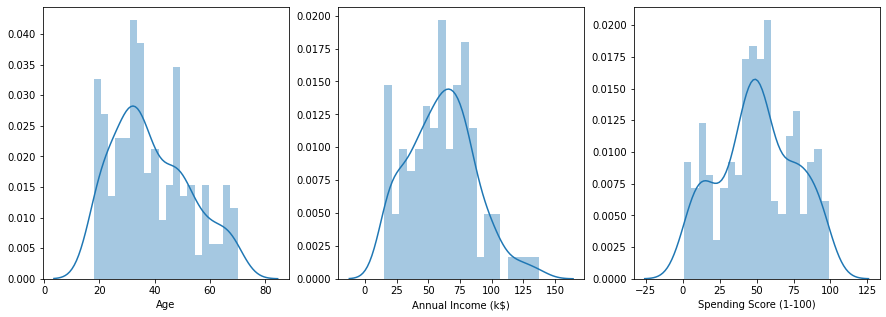

In [6]:
plt.figure(figsize=(15,5))
n=0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.distplot(dataset[x] , bins = 20)
plt.show()

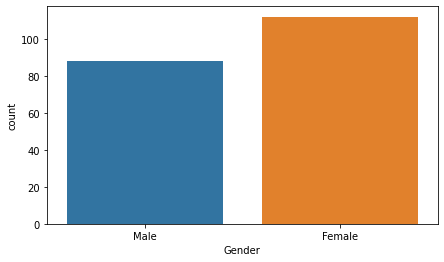

In [7]:
plt.figure( figsize = (7 , 4))
sns.countplot(x='Gender', data=dataset);

#### Let's apply clustering

First we will be applying clustering on the basis of Annual Income (k$)	 and Spending Score.


In [8]:
x = dataset.iloc[:, [3, 4]].values

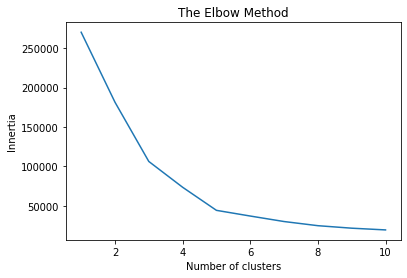

In [9]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Innertia')
plt.show()

Here we have used the <b>elbow method</b> to find the suitable number of clusters.

Now, from this graph we choose the cluster value where this decrease in inertia value becomes constant that value can be chosen as the right cluster value for our data.

So from this graph we see that 5 is the point where the curve changes drastically , it starts to become constant.

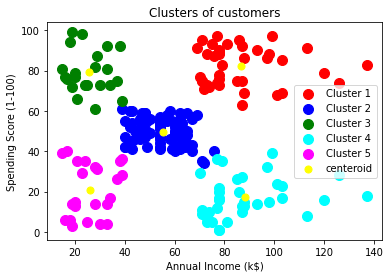

In [10]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow' , label = 'centeroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Cluster 1 - High spending High income  
Cluster 2 - Medium spending Medium income  
Cluster 3 - Low spending Low income  
Cluster 4 - High spending Low income  
Cluster 5 - Low spending High income

Now let's apply clustering on Age and Annual Income (k$)  .

In [11]:
x1 = dataset.iloc[:, [2,3]].values       

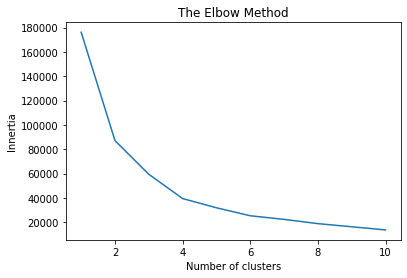

In [12]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x1)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Innertia')
plt.show()

Here I will be taking 6 as the optimum number of clusters. 

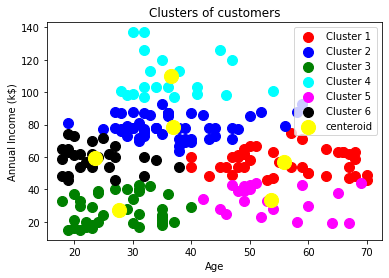

In [13]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x1)

# Visualising the clusters
plt.scatter(x1[y_kmeans == 0, 0], x1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x1[y_kmeans == 1, 0], x1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x1[y_kmeans == 2, 0], x1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x1[y_kmeans == 3, 0], x1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x1[y_kmeans == 4, 0], x1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(x1[y_kmeans == 5, 0], x1[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow' , label = 'centeroid')
plt.title('Clusters of customers')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Age')
plt.legend()
plt.show()

Cluster 1 - Average young age earners      
Cluster 2 - Low old age earners  
Cluster 3 - Average medium age earners  
Cluster 4 - Low young age earners  
Cluster 5 - Average old age earners  
Cluster 6 - High medium age earners 

Finally let's apply clustering on Age and Spending Score

In [14]:
x2 = dataset.iloc[:, [2,4]].values

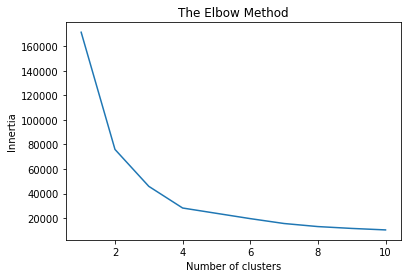

In [15]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x2)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Innertia')
plt.show()

Here I will be taking 4 as the optimum number of clusters.

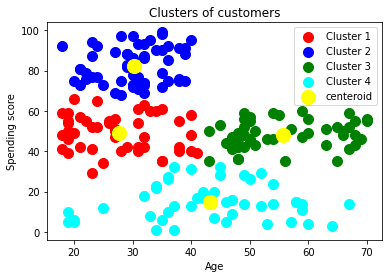

In [16]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x2)

# Visualising the clusters
plt.scatter(x2[y_kmeans == 0, 0], x2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x2[y_kmeans == 1, 0], x2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x2[y_kmeans == 2, 0], x2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x2[y_kmeans == 3, 0], x2[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow' , label = 'centeroid')
plt.title('Clusters of customers')
plt.ylabel('Spending score')
plt.xlabel('Age')
plt.legend()
plt.show()

Cluster 1 - Young average spender  
Cluster 2 - Young high spender  
Cluster 3 - Low spender  
Cluster 4 - Old average spender  

Till now we have visualized the clusters in 2d as we only had 2 features. 

So now let's take all those 3 features and create a 3d plot 

In [17]:
x3 = dataset.iloc[:, [2,3,4]].values

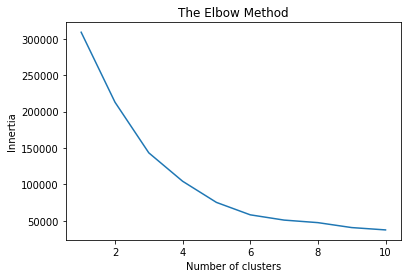

In [18]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x3)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Innertia')
plt.show()

So as we can see from the graph we can use 5 or 6 both the values but here I am taking 6 as the optimum no of clusters 

In [19]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(x3)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [20]:
py.offline.init_notebook_mode(connected = True)
dataset['label'] =  labels
trace1 = go.Scatter3d(
    x= dataset['Age'],
    y= dataset['Spending Score (1-100)'],
    z= dataset['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = dataset['label'], 
        size= 20,
        line=dict(
            color= dataset['label'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show();

<b>NOTE</b> : Please run the notebook by yourself to see the interactive 3D plot

Till now we have applied clustering on a small dataset which had low no of features so they were easy to visualize on graph but this is not case in real life , in real life we have hundreds of features for which the clusters cannot be visualized for every feature .

So to solve this problem we use dimension reduction techniques like <b>PCA(Principal Component Analysis)</b> . Which can reduce the total no of feature to our desired no of features. We will read about these dimension reduction techniques in depth in the next week.

For now let's see a small example so that it can become clear to you.

#### Clustering on a large dataset

#### Data exploration

In [21]:
dataset=pd.read_csv('data/wine-clustering.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [22]:
dataset.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [23]:
dataset.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [24]:
dataset.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

#### Data visualization

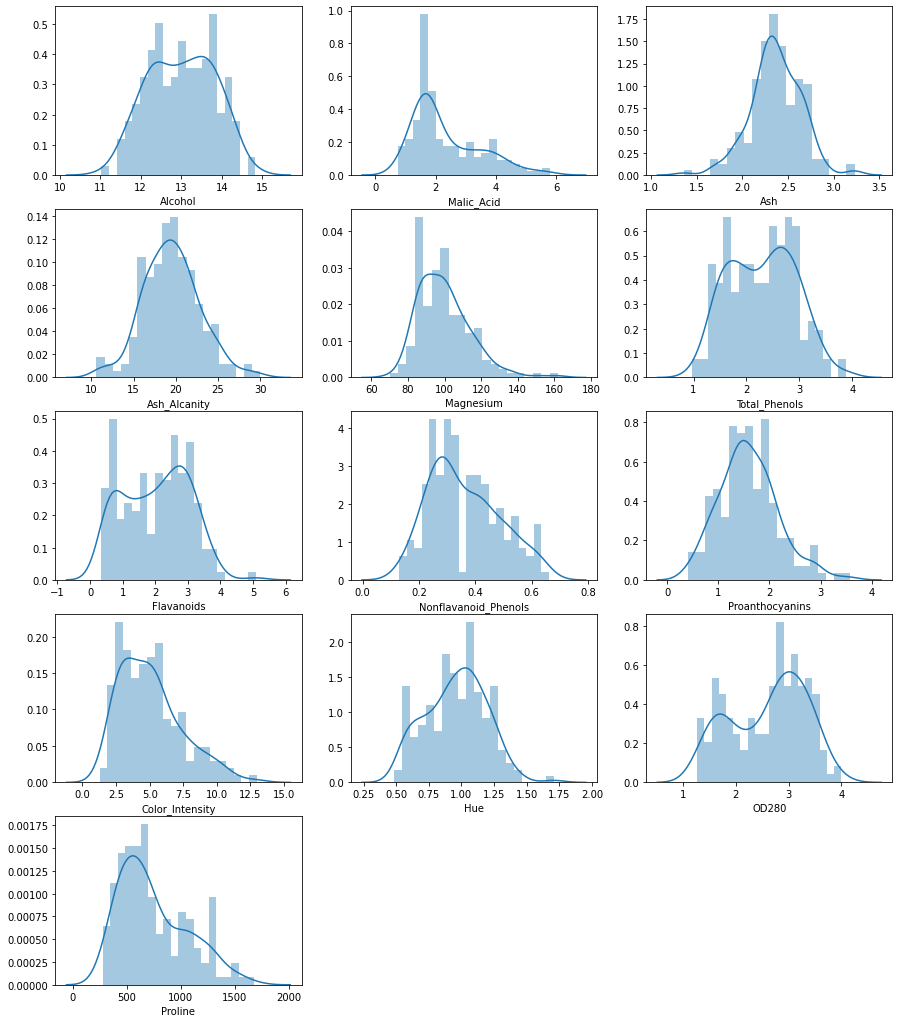

In [25]:
plt.figure(figsize=(15,18))
n=0
for x in dataset.columns:
    n+=1
    plt.subplot(5,3,n)
    sns.distplot(dataset[x] , bins = 20)
plt.show()

#### Data preprocessing

In [26]:
dataset[dataset.columns]=StandardScaler().fit_transform(dataset)
dataset=pd.DataFrame(dataset)
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [27]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(dataset)

print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 55.41%


#### Modeling

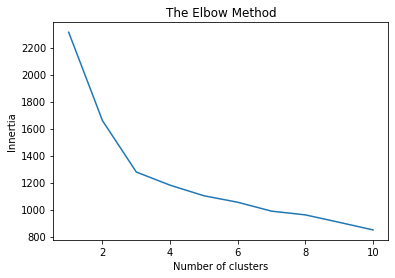

In [28]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(dataset)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Innertia')
plt.show()

So here we can see 3 is the optimum no of clusters that can be formed.

##### Silhouette score

To find the optimal no of clusters we have another method called Silhouette method. Usually silhouette method is more accurate than the elbow method    

Now let's try to compute the silhouette score. Here, the bigger score the better the clustering

In [29]:
silhouette = {}
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(dataset)
    silhouette[i] = silhouette_score(dataset, kmeans.labels_, metric='euclidean')

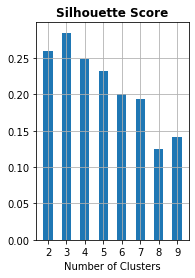

In [30]:
plt.subplot(1, 2, 2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

So this method also tells us that 3 is the optimal no of clusters.

You can read more about these methods [here](https://gdcoder.com/silhouette-analysis-vs-elbow-method-vs-davies-bouldin-index-selecting-the-optimal-number-of-clusters-for-kmeans-clustering/)

In [31]:
kmeans = KMeans(n_clusters=3,init='k-means++', max_iter = 300, n_init = 10, random_state = 0)
labels = kmeans.fit_predict(dataset)
pd.Series(labels).value_counts()

1    65
0    62
2    51
dtype: int64

In [32]:
centroids = kmeans.cluster_centers_
pca_centroids = pca_2.transform(centroids)

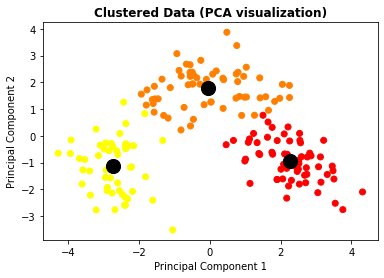

In [33]:
plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], c=labels, cmap='autumn')
plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1],s=200 ,color='black')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)',fontweight='bold')
plt.show()

# Hierarchical Clustering

Now we are going to see Hierarchical Clustering .  
This type of clustering basically works on the basis of minimize the distance only i.e it is a distance based clustering method.

Hierarchical clustering starts by assigning all data points as their own cluster. As the name suggests it builds the hierarchy and in the next step, it combines the two nearest data point and merges it together to one cluster.

Hierarchical Clustering is of 2 types :

1. <b>Agglomerative Hierarchical Clustering</b> - In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster 

2. <b>Divisive Hierarchical Clustering</b> - In Divisive is a top-down clustering method where we assign all of the observations to a single cluster and then partition the cluster to two least similar clusters. Finally, we proceed recursively on each cluster until there is one cluster for each observation. So this clustering approach is exactly opposite to Agglomerative clustering.

<img src="images/hierarchial_approach.jfif" />

The main difference between the two methods of hierarchical Clustering is only the approach we take but <b>Divisive clustering</b> is rarely done in practice so in this week we are only going to study <b>Agglomerative Hierarchical Clustering</b>.

#### Agglomerative Hierarchical Clustering algorithm

Step 1 : Assign each data point to its own cluster.  
Step 2 : Find closest pair of cluster using euclidean distance and merge them in to single cluster.  
Step 3 : Calculate distance between two nearest clusters and combine until all items are clustered in to a single cluster.

The result of this clustering method is represented on a <b>Dendrogram</b> which tells us how many cluster will be there.  

<img src="images/hierarch.gif" />

Let's try to understand this better in the next part.

#### Importings

Importing all the necessary libraries

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering

I will be using the same <b>Wine dataset</b> that I have already used in k-means and I will be also be assuming that I have already done Data exploration and visualization part on the dataset.  

In [35]:
std_sca=StandardScaler()
df_cluster=dataset.copy()
df_cluster[df_cluster.columns]=std_sca.fit_transform(df_cluster)
df_cluster.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Before we move further , we should know a little about <b>Linkage methods</b>.  
Linkage methods are a way to measure the distance between clusters in order to decide the rules for clustering.  
They are Complete-linkage, Single-linkage, Average-linkage, Centroid-linkage, average, weighted, median and ward.
If you want to know more about Linkage you can read [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) 

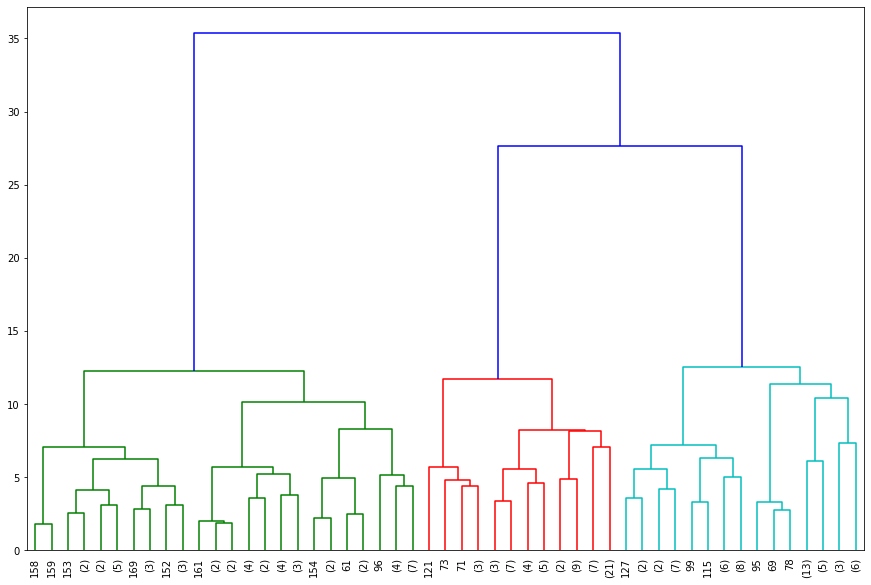

In [36]:
Z=linkage(df_cluster,method="ward")
plt.figure(figsize=(15,10))
dendrogram(Z,leaf_rotation=90,p=5,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.show()

This is what you call a <b>Dendrogram</b>.  
A Dendrogram is basically a type of tree diagram showing hierarchical relationships between different sets of data.
A Dendrogram contains the memory of hierarchical clustering algorithm, so just by looking at the Dendrgram you can tell how the cluster is formed.

So to find the number of clusters formed you have to look at the longest vertical line which is not intercepted by a horizontal line.After we find out the longest vertical line we have to split it horizontally and the no of vertical lines it touches tells you how many clusters will be there.  
So in our case a horizontal line can be drawn on the first blue line from the left which will cut 3 vertical lines. 

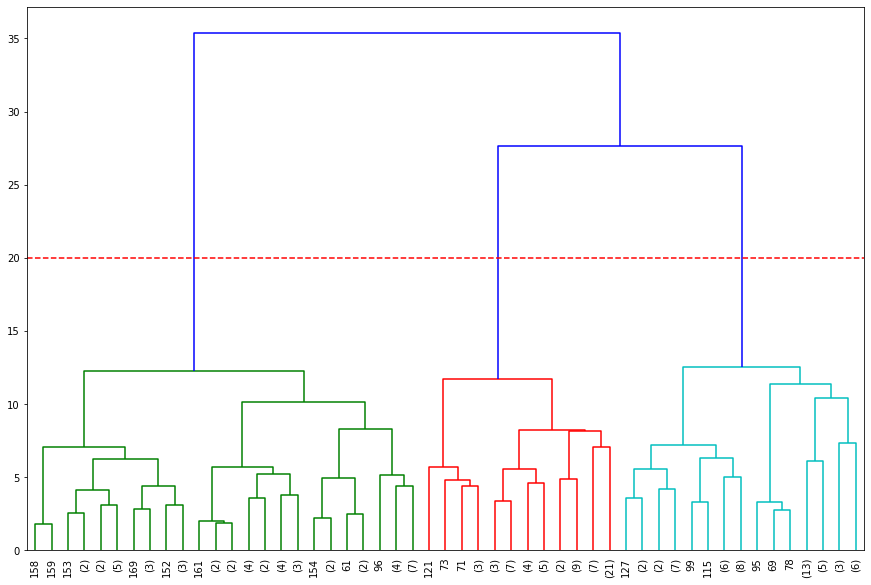

In [37]:
Z=linkage(df_cluster,method="ward")
plt.figure(figsize=(15,10))
dendrogram(Z,leaf_rotation=90,p=5,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.axhline(y=20, color='r', linestyle='--')
plt.show()

<center><b>OR</b></center>

You can also use the <b>Silhouette score</b> that we used above to find the no of clusters.

In [38]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hc.fit(df_cluster)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [39]:
hc.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [40]:
clusters_agg=pd.concat([dataset, pd.DataFrame({'cluster':hc.labels_})], axis=1)
clusters_agg.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2
